In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
dating1=pd.read_csv('/Users/andreewerner/Downloads/SpeedDatingDataCleaned.csv')


In [9]:
X = dating1.drop('match', axis=1)
y = dating1['match']
for i in X.columns:
    if 'Unnamed' in i:
        del X[i]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2)


In [10]:
model = KNeighborsClassifier(n_neighbors=5)
model_knn=model.fit(X_train, y_train)
y_pred_train = model_knn.predict(X_train)
y_pred_val=model_knn.predict(X_val)
print(metrics.accuracy_score(y_train, y_pred_train))
print (metrics.accuracy_score(y_val, y_pred_val))

0.8622336517266715
0.8104335047759


In [11]:
model = LogisticRegression(C=1000)
model_logreg=model.fit(X_train, y_train)
y_pred_train = model_logreg.predict(X_train)
y_pred_val=model_logreg.predict(X_val)
print(metrics.accuracy_score(y_train, y_pred_train))
print (metrics.accuracy_score(y_val, y_pred_val))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8433137398971344
0.8273328434974284


In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model_gnb=model.fit(X_train, y_train)
y_pred_train = model_gnb.predict(X_train)
y_pred_val=model_gnb.predict(X_val)
print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_val, y_pred_val))

0.744121969140338
0.7127112417340191


In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_dt=model.fit(X_train, y_train)
y_pred_train = model_dt.predict(X_train)
y_pred_val = model_dt.predict(X_val)

print(metrics.accuracy_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_val, y_pred_val))

1.0
0.7707567964731815


In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_rf=model.fit(X_train, y_train)
y_pred_train= model_rf.predict(X_train)
y_pred_val=model_rf.predict(X_val)
print('Random Forest Training Score:', metrics.accuracy_score(y_train, y_pred_train))
print('Random Forest Validation Score:', metrics.accuracy_score(y_val, y_pred_val))

Random Forest Training Score: 0.9825495958853784
Random Forest Validation Score: 0.8346803820720059


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
from xgboost import XGBClassifier
import xgboost as xgb


In [16]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.02, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=True #gives output log as below
                   )



[0]	validation_0-error:0.164401	validation_1-error:0.164585
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.154482	validation_1-error:0.159442
[2]	validation_0-error:0.154115	validation_1-error:0.160176
[3]	validation_0-error:0.155217	validation_1-error:0.158707
[4]	validation_0-error:0.15338	validation_1-error:0.158707
[5]	validation_0-error:0.152645	validation_1-error:0.156503
[6]	validation_0-error:0.154666	validation_1-error:0.159442
[7]	validation_0-error:0.15191	validation_1-error:0.160176
[8]	validation_0-error:0.154666	validation_1-error:0.155768
[9]	validation_0-error:0.157054	validation_1-error:0.156503
[10]	validation_0-error:0.155584	validation_1-error:0.156503
[11]	validation_0-error:0.154849	validation_1-error:0.157237
[12]	validation_0-error:0.155033	validation_1-error:0.157972
[13]	validation_0-error:0.155217	validation_1-error:0.1572

In [17]:
gbm.get_booster().get_score(importance_type='gain') #extract raw gain scores


{'choosy': 25.875662281949996,
 'intel_o': 20.194204453176464,
 'sinc3_1': 5.02548345,
 'pid': 8.120391153227272,
 'intel1_2': 6.454423332,
 'sinc': 16.082031623312503,
 'iid': 6.253282026363636,
 'sinc7_2': 8.878479002499999,
 'intel7_3': 4.71075439,
 'tvsports': 5.9660838852,
 'intel': 19.222763588133333,
 'date_3': 16.03608386666667,
 'desirability': 28.47094430708608,
 'met_o': 11.095550681924243,
 'shopping': 7.786769674999999,
 'match_es': 13.763542386842106,
 'pf_o_fun': 5.499661094130434,
 'pf_o_sin': 6.113524900606062,
 'pf_o_int': 4.1192849713125,
 'amb_o': 7.098158261166665,
 'sinc_o': 17.646700700677965,
 'reading': 6.22729397,
 'sinc4_3': 5.03723145,
 'order': 4.780556040666667,
 'amb3_2': 4.111394882333333,
 'fun1_3': 10.004450874615383,
 'tv': 4.806371816272727,
 'age': 8.510024176,
 'satis_2': 5.4609434204,
 'amb': 5.346768521,
 'tuition': 8.17842007,
 'career_c': 6.03316402,
 'museums': 2.7236702450000005,
 'art': 4.3074902046,
 'expnum': 7.171096798571428,
 'dummy_har

In [18]:
metrics.accuracy_score(y_val, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)) 

0.8471711976487877

In [19]:
metrics.accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

0.8678414096916299

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model_xgb = model.fit(X_train, y_train)
y_pred_train = model_xgb.predict(X_train)
y_pred_val = model_xgb.predict(X_val)
print('Training Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
print('Validation Accuracy:', metrics.accuracy_score(y_val, y_pred_val))
print('Validation Accuracy:', metrics.accuracy_score(y_val, y_pred_val))


Training Accuracy: 0.8802351212343865
Validation Accuracy: 0.8486407053637032
Validation Accuracy: 0.8486407053637032


[12:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[12:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:49:54] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_

[12:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[12:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[12:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[12:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[12:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[12:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[12:49:58] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_

[12:50:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[12:50:00] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[12:50:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:50:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12:50:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=4
[12:50:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[12:50:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[12:50:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[12:50:01] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_

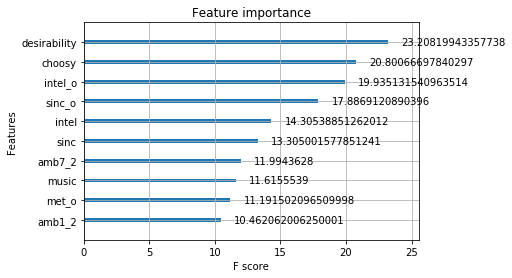

In [21]:
booster_ = XGBClassifier(learning_rate=0.02, max_depth=4, n_estimators=200, 
                      silent=False, objective='binary:logistic', nthread=-1, 
                      gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
                      colsample_bytree=1, colsample_bylevel=1, reg_alpha=0,
                      reg_lambda=1, scale_pos_weight=1, base_score=0.5, seed=0)

booster_.fit(X_train, y_train)

from xgboost import plot_importance
plot_importance(booster_, max_num_features=10, importance_type='gain')


TypeError: fill_between() missing 1 required positional argument: 'y1'

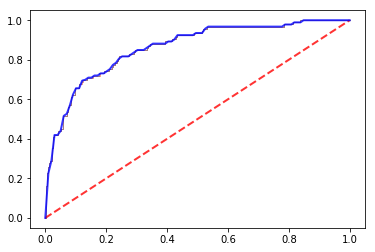

In [22]:
# Code from the sklearn documentation

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn import metrics
cv = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X.values, y.values):
    probas_ = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3)

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = metrics.auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr,  color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_rf.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins = True)


In [44]:
from sklearn.metrics import recall_score, precision_score, f1_score, fbeta_score
# print('Training Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
# print('Validation Accuracy:', metrics.accuracy_score(y_val, y_pred_val))
# 
print ('Recall Score:', recall_score(y_test, y_pred))
print ('Precision Score:', precision_score(y_test, y_pred))
print('F-beta Score:', fbeta_score(y_test, y_pred, beta=1.5))
print('Training Accuracy:', metrics.accuracy_score(y_train, y_pred_train))
print('Validation Accuracy:', metrics.accuracy_score(y_val, y_pred_val))

Recall Score: 0.7525773195876289
Precision Score: 0.9240506329113924
F-beta Score: 0.7981497056349873
Training Accuracy: 0.8752755326965467
Validation Accuracy: 0.8508449669360764
